In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import json

In [2]:
df = pd.read_csv("Poverty by Poverty Level.csv")
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9745,Brooklyn,100 to 199% FPL,2019,Percent,0.17787,36047
9746,Manhattan,100 to 199% FPL,2019,Percent,0.11092,36061
9747,Queens,100 to 199% FPL,2019,Percent,0.17272,36081
9748,Staten Island,100 to 199% FPL,2019,Percent,0.11962,36085


In [3]:
df.drop(df.index[df['Location'] == 'Brooklyn'], inplace = True)
df.drop(df.index[df['Location'] == 'Manhattan'], inplace = True)
df.drop(df.index[df['Location'] == 'Queens'], inplace = True)
df.drop(df.index[df['Location'] == 'Staten Island'], inplace = True)
df.drop(df.index[df['Location'] == 'New York City'], inplace = True)
df.drop(df.index[df['Location'] == 'Bronx'], inplace = True)
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9739,Queens Village,100 to 199% FPL,2019,Percent,0.11481,413
9740,The Rockaways,100 to 199% FPL,2019,Percent,0.17979,414
9741,St. George,100 to 199% FPL,2019,Percent,0.11194,501
9742,South Beach,100 to 199% FPL,2019,Percent,0.15882,502


In [4]:
df = df.loc[df['DataFormat'] == 'Number']
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9414,Queens Village,100 to 199% FPL,2019,Number,22590.00000,413
9415,The Rockaways,100 to 199% FPL,2019,Number,21113.00000,414
9416,St. George,100 to 199% FPL,2019,Number,19394.00000,501
9417,South Beach,100 to 199% FPL,2019,Number,21726.00000,502


In [10]:
dict1 = {
'Below 100% FPL': 'Below 25,750 USD',
'100 to 199% FPL': '25,750 to 51,499 USD',
'Below 200% FPL': 'Below 51,500 USD',
'200 to 399% FPL': '51,500 to 102,999 USD',
'400% FPL and above': '100,300 USD and above'
}

In [11]:
df['Poverty_Level'] = df['Poverty Level']
df['Poverty_Level'] = df['Poverty_Level'].replace(dict1)
df

<ipython-input-11-085ab6fb7cc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poverty_Level'] = df['Poverty Level']
<ipython-input-11-085ab6fb7cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poverty_Level'] = df['Poverty_Level'].replace(dict1)


,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,"Below 25,750 USD"
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101,"25,750 to 51,499 USD"
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101,"Below 51,500 USD"
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101,"51,500 to 102,999 USD"
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101,"100,300 USD and above"
...,...,...,...,...,...,...,...
9414,Queens Village,100 to 199% FPL,2019,Number,22590.00000,413,"25,750 to 51,499 USD"
9415,The Rockaways,100 to 199% FPL,2019,Number,21113.00000,414,"25,750 to 51,499 USD"
9416,St. George,100 to 199% FPL,2019,Number,19394.00000,501,"25,750 to 51,499 USD"
9417,South Beach,100 to 199% FPL,2019,Number,21726.00000,502,"25,750 to 51,499 USD"


In [12]:
df_sum = df.groupby(['Poverty_Level', 'TimeFrame'])['Data'].sum()
df_sum

Poverty_Level          TimeFrame
100,300 USD and above  2005         2735707.0
                       2006         2740115.0
                       2007         2812422.0
                       2008         2950688.0
                       2009         2989820.0
                                      ...    
Below 51,500 USD       2015         3284498.0
                       2016         3180971.0
                       2017         3089625.0
                       2018         2921470.0
                       2019         2682754.0
Name: Data, Length: 75, dtype: float64

In [13]:
df_sum = df_sum.reset_index()
df_sum.head()

,Poverty_Level,TimeFrame,Data
0,"100,300 USD and above",2005,2735707.0
1,"100,300 USD and above",2006,2740115.0
2,"100,300 USD and above",2007,2812422.0
3,"100,300 USD and above",2008,2950688.0
4,"100,300 USD and above",2009,2989820.0


In [14]:
df_sum_mean = df_sum.groupby(['Poverty_Level'])['Data'].mean()
df_sum_mean

Poverty_Level
100,300 USD and above    2.931912e+06
25,750 to 51,499 USD     1.560852e+06
51,500 to 102,999 USD    2.158948e+06
Below 25,750 USD         1.574002e+06
Below 51,500 USD         3.134853e+06
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population Income Levels in NYC')

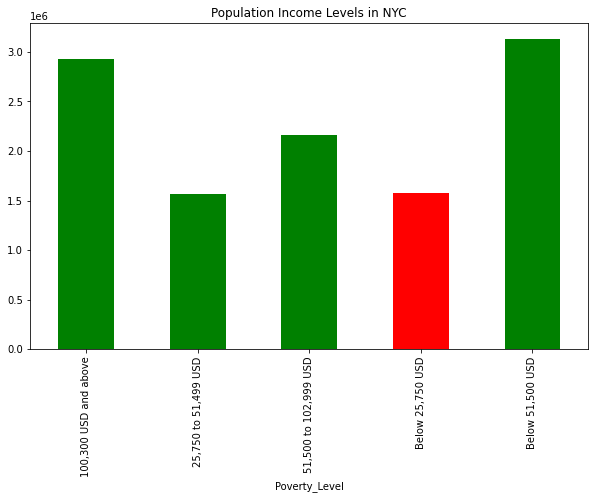

In [29]:
poverty_graph = df_sum_mean.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
poverty_graph.set_title('Population Income Levels in NYC')

In [25]:
searchfor = ['Below 100% FPL']
top10_pov = df[df['Poverty Level'].str.contains('|'.join(searchfor))]
top10_pov

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,"Below 25,750 USD"
5,Battery Park/Tribeca,Below 100% FPL,2006,Number,7832.95553,101,"Below 25,750 USD"
10,Battery Park/Tribeca,Below 100% FPL,2007,Number,4017.84258,101,"Below 25,750 USD"
15,Battery Park/Tribeca,Below 100% FPL,2008,Number,5020.58688,101,"Below 25,750 USD"
20,Battery Park/Tribeca,Below 100% FPL,2009,Number,4401.09040,101,"Below 25,750 USD"
...,...,...,...,...,...,...,...
9219,Queens Village,Below 100% FPL,2019,Number,11279.00000,413,"Below 25,750 USD"
9220,The Rockaways,Below 100% FPL,2019,Number,22570.00000,414,"Below 25,750 USD"
9221,St. George,Below 100% FPL,2019,Number,18624.00000,501,"Below 25,750 USD"
9222,South Beach,Below 100% FPL,2019,Number,8588.00000,502,"Below 25,750 USD"


In [27]:
top10_pov_stats = top10_pov.groupby('Location')['Data'].mean()
top10_pov_stats = top10_pov_stats.sort_values(ascending = False)
top10_pov_stats = top10_pov_stats.head(10)
top10_pov_stats

Location
University Heights      53699.200000
Concourse/Highbridge    50812.533333
Washington Heights      48809.666667
Unionport/Soundview     48012.133333
Borough Park            47147.733333
East New York           44856.600000
Brownsville             42385.933333
Bedford Stuyvesant      41492.533333
Bedford Park            40713.266667
Lower East Side         40681.733333
Name: Data, dtype: float64

Text(0.5, 1.0, 'Top 10 NYC Regions in Poverty')

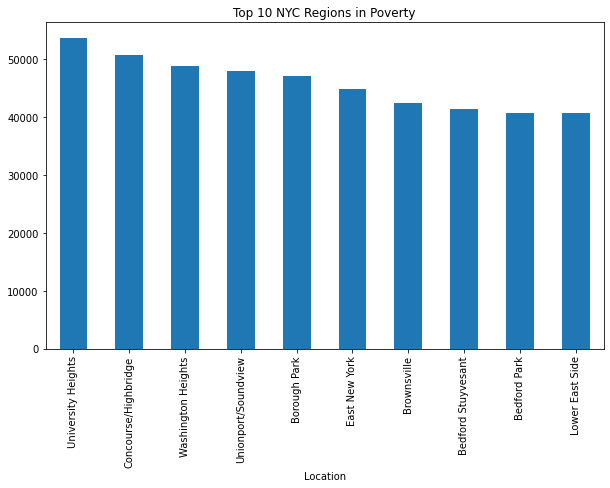

In [28]:
top10_pov_graph = top10_pov_stats.plot.bar(figsize=(10,6))
top10_pov_graph.set_title('Top 10 NYC Regions in Poverty')

In [17]:
cd = [110,111,201,202,203,204,205,206]
top_asthma_df = df.loc[df['Fips'].isin(cd)]
top_asthma_df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
630,Central Harlem,Below 100% FPL,2005,Number,39121.00000,110,"Below 25,750 USD"
631,Central Harlem,100 to 199% FPL,2005,Number,22217.00000,110,"25,750 to 51,499 USD"
632,Central Harlem,Below 200% FPL,2005,Number,61338.00000,110,"Below 51,500 USD"
633,Central Harlem,200 to 399% FPL,2005,Number,31232.00000,110,"51,500 to 102,999 USD"
634,Central Harlem,400% FPL and above,2005,Number,24124.00000,110,"100,300 USD and above"
...,...,...,...,...,...,...,...
9373,Hunts Point,100 to 199% FPL,2019,Number,11848.69770,202,"25,750 to 51,499 USD"
9374,Morrisania,100 to 199% FPL,2019,Number,21736.77175,203,"25,750 to 51,499 USD"
9375,Concourse/Highbridge,100 to 199% FPL,2019,Number,43312.00000,204,"25,750 to 51,499 USD"
9376,University Heights,100 to 199% FPL,2019,Number,32217.00000,205,"25,750 to 51,499 USD"


In [20]:
top_asthma_df_sum = top_asthma_df.groupby(['Location','Poverty_Level', 'TimeFrame'])['Data'].sum()
top_asthma_df_sum

Location            Poverty_Level          TimeFrame
Central Harlem      100,300 USD and above  2005         24124.0
                                           2006         26749.0
                                           2007         25237.0
                                           2008         31449.0
                                           2009         38189.0
                                                         ...   
University Heights  Below 51,500 USD       2015         92461.0
                                           2016         83338.0
                                           2017         97798.0
                                           2018         85833.0
                                           2019         76138.0
Name: Data, Length: 600, dtype: float64

In [22]:
top_asthma_df_sum = top_asthma_df_sum.to_frame()
top_asthma_df_sum = top_asthma_df_sum.reset_index()
top_asthma_df_sum

,Location,Poverty_Level,TimeFrame,Data
0,Central Harlem,"100,300 USD and above",2005,24124.0
1,Central Harlem,"100,300 USD and above",2006,26749.0
2,Central Harlem,"100,300 USD and above",2007,25237.0
3,Central Harlem,"100,300 USD and above",2008,31449.0
4,Central Harlem,"100,300 USD and above",2009,38189.0
...,...,...,...,...
595,University Heights,"Below 51,500 USD",2015,92461.0
596,University Heights,"Below 51,500 USD",2016,83338.0
597,University Heights,"Below 51,500 USD",2017,97798.0
598,University Heights,"Below 51,500 USD",2018,85833.0


In [23]:
top_asthma_df_sum_mean = top_asthma_df_sum.groupby(['Poverty_Level'])['Data'].mean()
top_asthma_df_sum_mean

Poverty_Level
100,300 USD and above    14222.083333
25,750 to 51,499 USD     26847.500000
51,500 to 102,999 USD    24699.616667
Below 25,750 USD         37975.358333
Below 51,500 USD         64822.858333
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population Income Levels in High Asthma Regions')

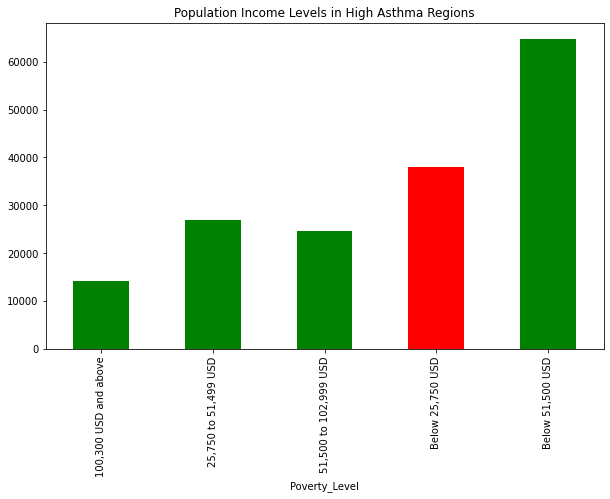

In [30]:
poverty_asthma_graph = top_asthma_df_sum_mean.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
poverty_asthma_graph.set_title('Population Income Levels in High Asthma Regions')

In [4]:
uhf_code_dict3 = {
503:'willowbrook',                             
206:'borough park', 
211:'williamsburg - bushwick',                 
105:'crotona -tremont',                        
107:'hunts point - mott haven',                
504:'south beach - tottenville',               
208: 'canarsie - flatlands',                   
302:'central harlem - morningside heights',    
408:'jamaica',                                 
403:'flushing - clearview',                    
410:'rockaway',                               
404:'bayside - little neck',                   
305:'upper east side',                        
401:'long island city - astoria',              
203:'bedford stuyvesant - crown heights',      
101:'kingsbridge - riverdale',                
201:'greenpoint',                              
204:'east new york',                           
207:'east flatbush - flatbush',                
301:'washington heights',                     
502:'stapleton - st. george',                 
210:'coney island - sheepshead bay',           
104:'pelham - throgs neck',                   
106:'high bridge - morrisania',           
402:'west queens',                             
209:'bensonhurst - bay ridge',                
405:'ridgewood - forest hills',                
307:'gramercy park - murray hill',             
205:'sunset park',                             
103:'fordham - bronx pk',                      
309:'union square - lower east side',          
407:'southwest queens',                       
306:'chelsea - clinton',                     
406:'fresh meadows',                           
202:'downtown - heights - slope',              
310:'lower manhattan',                         
308:'greenwich village - soho',                
303:'east harlem',                             
304:'upper west side',                         
102:'northeast bronx',                         
501:'port richmond',                           
409:'southeast queens'
} 

In [5]:
df['boro_cd'] = df['Fips']
df['boro_cd'] = df['boro_cd'].replace(uhf_code_dict3)
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,boro_cd
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,kingsbridge - riverdale
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101,kingsbridge - riverdale
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101,kingsbridge - riverdale
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101,kingsbridge - riverdale
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101,kingsbridge - riverdale
...,...,...,...,...,...,...,...
9739,Queens Village,100 to 199% FPL,2019,Percent,0.11481,413,413
9740,The Rockaways,100 to 199% FPL,2019,Percent,0.17979,414,414
9741,St. George,100 to 199% FPL,2019,Percent,0.11194,501,port richmond
9742,South Beach,100 to 199% FPL,2019,Percent,0.15882,502,stapleton - st. george


In [24]:
dict1 = {
'Below 100% FPL': 'Below 25,750 USD',
'100 to 199% FPL': '25,750 to 51,499 USD',
'Below 200% FPL': 'Below 51,500 USD',
'200 to 399% FPL': '51,500 to 102,999 USD',
'400% FPL and above': '100,300 USD and above'
}

In [25]:
df['Poverty_Level'] = df['Poverty Level']
df['Poverty_Level'] = df['Poverty_Level'].replace(dict1)
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,boro_cd,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,kingsbridge - riverdale,"Below 25,750 USD"
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101,kingsbridge - riverdale,"25,750 to 51,499 USD"
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101,kingsbridge - riverdale,"Below 51,500 USD"
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101,kingsbridge - riverdale,"51,500 to 102,999 USD"
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101,kingsbridge - riverdale,"100,300 USD and above"
...,...,...,...,...,...,...,...,...
9739,Queens Village,100 to 199% FPL,2019,Percent,0.11481,413,413,"25,750 to 51,499 USD"
9740,The Rockaways,100 to 199% FPL,2019,Percent,0.17979,414,414,"25,750 to 51,499 USD"
9741,St. George,100 to 199% FPL,2019,Percent,0.11194,501,port richmond,"25,750 to 51,499 USD"
9742,South Beach,100 to 199% FPL,2019,Percent,0.15882,502,stapleton - st. george,"25,750 to 51,499 USD"


In [26]:
df.groupby('Poverty_Level')['Data'].mean()

Poverty_Level
100,300 USD and above    24846.892074
25,750 to 51,499 USD     13227.650699
51,500 to 102,999 USD    18296.299604
Below 25,750 USD         13339.098866
Below 51,500 USD         26566.749564
Name: Data, dtype: float64

Text(0.5, 1.0, 'Mean Poverty Levels in NYC')

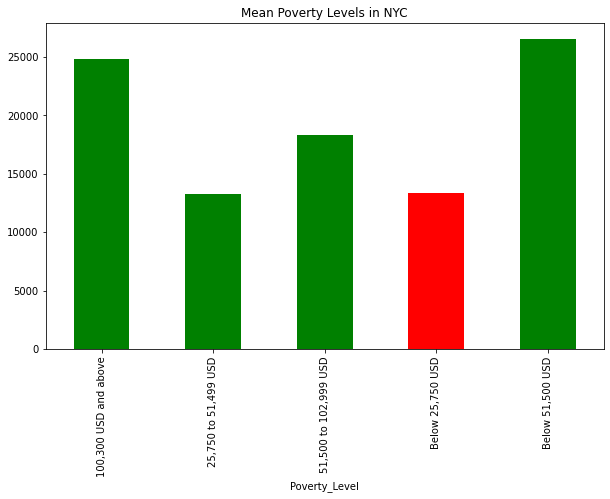

In [27]:
mean_poverty = df.groupby('Poverty_Level')['Data'].mean()
mean_pov_graph = mean_poverty.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
mean_pov_graph.set_title('Mean Poverty Levels in NYC')

In [6]:
df.groupby('Poverty Level')['Data'].mean()

Poverty Level
100 to 199% FPL       13227.650699
200 to 399% FPL       18296.299604
400% FPL and above    24846.892074
Below 100% FPL        13339.098866
Below 200% FPL        26566.749564
Name: Data, dtype: float64

Text(0.5, 1.0, 'Mean Poverty Levels in NYC')

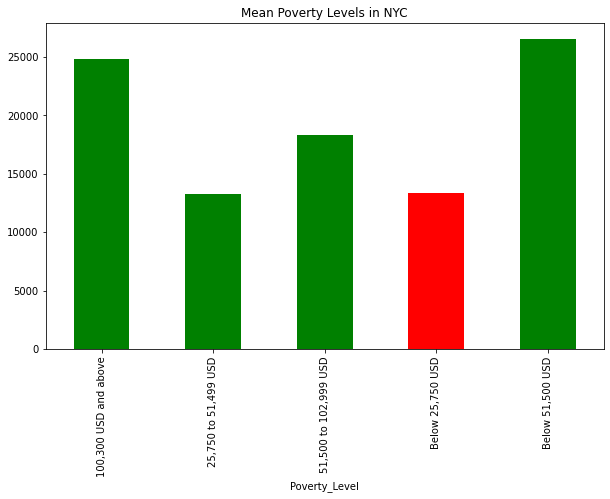

In [48]:
mean_poverty = df.groupby('Poverty_Level')['Data'].mean()
mean_pov_graph = mean_poverty.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
mean_pov_graph.set_title('Mean Poverty Levels in NYC')

In [32]:
searchfor = ['Below 100% FPL']
top10_pov = df[df['Poverty Level'].str.contains('|'.join(searchfor))]
top10_pov

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,boro_cd,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,kingsbridge - riverdale,"Below 25,750 USD"
5,Battery Park/Tribeca,Below 100% FPL,2006,Number,7832.95553,101,kingsbridge - riverdale,"Below 25,750 USD"
10,Battery Park/Tribeca,Below 100% FPL,2007,Number,4017.84258,101,kingsbridge - riverdale,"Below 25,750 USD"
15,Battery Park/Tribeca,Below 100% FPL,2008,Number,5020.58688,101,kingsbridge - riverdale,"Below 25,750 USD"
20,Battery Park/Tribeca,Below 100% FPL,2009,Number,4401.09040,101,kingsbridge - riverdale,"Below 25,750 USD"
...,...,...,...,...,...,...,...,...
9544,Queens Village,Below 100% FPL,2019,Percent,0.05733,413,413,"Below 25,750 USD"
9545,The Rockaways,Below 100% FPL,2019,Percent,0.19219,414,414,"Below 25,750 USD"
9546,St. George,Below 100% FPL,2019,Percent,0.10750,501,port richmond,"Below 25,750 USD"
9547,South Beach,Below 100% FPL,2019,Percent,0.06278,502,stapleton - st. george,"Below 25,750 USD"


In [33]:
top10_pov_stats = top10_pov.groupby('Location')['Data'].mean()
top10_pov_stats = top10_pov_stats.sort_values(ascending = False)
top10_pov_stats = top10_pov_stats.head(10)
top10_pov_stats

Location
University Heights      26849.799054
Concourse/Highbridge    25406.448936
Washington Heights      24404.948297
Unionport/Soundview     24006.198991
Borough Park            23574.015501
East New York           22428.441915
Brownsville             21193.145445
Bedford Stuyvesant      20746.417151
Bedford Park            20356.791122
Lower East Side         20340.996255
Name: Data, dtype: float64

In [34]:
top10_pov.groupby(['Location','Poverty_Level'])['Data'].mean()

Location                   Poverty_Level   
Astoria                    Below 25,750 USD    14070.680381
Battery Park/Tribeca       Below 25,750 USD     2386.126193
Bay Ridge                  Below 25,750 USD     9398.074723
Bayside                    Below 25,750 USD     4421.037445
Bedford Park               Below 25,750 USD    20356.791122
Bedford Stuyvesant         Below 25,750 USD    20746.417151
Bensonhurst                Below 25,750 USD    15561.685056
Borough Park               Below 25,750 USD    23574.015501
Brownsville                Below 25,750 USD    21193.145445
Bushwick                   Below 25,750 USD    19092.345265
Canarsie                   Below 25,750 USD    10805.352858
Central Harlem             Below 25,750 USD    18450.173496
Chelsea/Clinton            Below 25,750 USD     5768.735227
Concourse/Highbridge       Below 25,750 USD    25406.448936
Coney Island               Below 25,750 USD    13592.791566
Crown Heights North        Below 25,750 USD    15411.821

In [35]:
top10_poverty_stats = top10_pov.groupby(['Location','Poverty_Level'])['Data'].mean()
top10_poverty_stats = top10_poverty_stats.sort_values(ascending = False)
top10_poverty_stats = top10_poverty_stats.head(10)
top10_poverty_stats

Location              Poverty_Level   
University Heights    Below 25,750 USD    26849.799054
Concourse/Highbridge  Below 25,750 USD    25406.448936
Washington Heights    Below 25,750 USD    24404.948297
Unionport/Soundview   Below 25,750 USD    24006.198991
Borough Park          Below 25,750 USD    23574.015501
East New York         Below 25,750 USD    22428.441915
Brownsville           Below 25,750 USD    21193.145445
Bedford Stuyvesant    Below 25,750 USD    20746.417151
Bedford Park          Below 25,750 USD    20356.791122
Lower East Side       Below 25,750 USD    20340.996255
Name: Data, dtype: float64

Text(0.5, 1.0, 'Top 10 NYC Regions in Poverty')

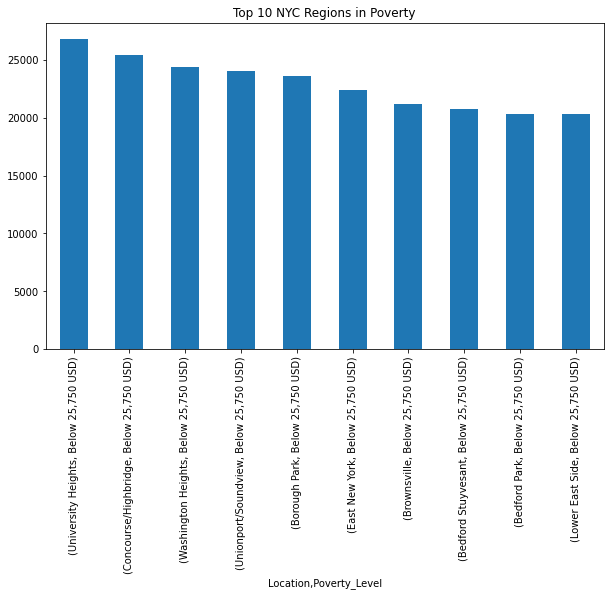

In [55]:
top10_poverty_graph = top10_poverty_stats.plot.bar(figsize=(10,6))
top10_poverty_graph.set_title('Top 10 NYC Regions in Poverty')

In [13]:
array = ['hunts point - mott haven','east harlem','crotona -tremont','high bridge - morrisania','central harlem - morningside heights']
top5_df = df.loc[df['boro_cd'].isin(array)]
top5_df = top5_df[top5_df['DataFormat'].str.contains('Number')]
top5_df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,boro_cd
280,Midtown Business District,Below 100% FPL,2005,Number,5140.68266,105,crotona -tremont
281,Midtown Business District,100 to 199% FPL,2005,Number,5117.00056,105,crotona -tremont
282,Midtown Business District,Below 200% FPL,2005,Number,10257.68322,105,crotona -tremont
283,Midtown Business District,200 to 399% FPL,2005,Number,7590.94575,105,crotona -tremont
284,Midtown Business District,400% FPL and above,2005,Number,27590.64288,105,crotona -tremont
...,...,...,...,...,...,...,...
9364,Midtown Business District,100 to 199% FPL,2019,Number,3884.86445,105,crotona -tremont
9365,Murray Hill/Stuyvesant,100 to 199% FPL,2019,Number,3434.00000,106,high bridge - morrisania
9366,Upper West Side,100 to 199% FPL,2019,Number,9940.00000,107,hunts point - mott haven
9385,Fort Greene/Brooklyn Hts,100 to 199% FPL,2019,Number,9506.00000,302,central harlem - morningside heights


In [37]:
cd = [110,111,201,202,203,204,205,206]
top_asthma_df = df.loc[df['Fips'].isin(cd)]
top_asthma_df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,boro_cd,Poverty_Level
630,Central Harlem,Below 100% FPL,2005,Number,39121.00000,110,110,"Below 25,750 USD"
631,Central Harlem,100 to 199% FPL,2005,Number,22217.00000,110,110,"25,750 to 51,499 USD"
632,Central Harlem,Below 200% FPL,2005,Number,61338.00000,110,110,"Below 51,500 USD"
633,Central Harlem,200 to 399% FPL,2005,Number,31232.00000,110,110,"51,500 to 102,999 USD"
634,Central Harlem,400% FPL and above,2005,Number,24124.00000,110,110,"100,300 USD and above"
...,...,...,...,...,...,...,...,...
9698,Hunts Point,100 to 199% FPL,2019,Percent,0.23501,202,downtown - heights - slope,"25,750 to 51,499 USD"
9699,Morrisania,100 to 199% FPL,2019,Percent,0.26331,203,bedford stuyvesant - crown heights,"25,750 to 51,499 USD"
9700,Concourse/Highbridge,100 to 199% FPL,2019,Percent,0.31142,204,east new york,"25,750 to 51,499 USD"
9701,University Heights,100 to 199% FPL,2019,Percent,0.23722,205,sunset park,"25,750 to 51,499 USD"


In [38]:
top_asthma_df_grouped = top_asthma_df.groupby(['Fips','Poverty_Level'])['Data']
race_asthma_df = top_asthma_df_grouped.mean()
race_asthma_df.reset_index()
race_asthma_df

Fips  Poverty_Level        
110   100,300 USD and above    17336.397378
      25,750 to 51,499 USD     13555.336556
      51,500 to 102,999 USD    16599.792571
      Below 25,750 USD         18450.173496
      Below 51,500 USD         32005.510051
111   100,300 USD and above    12476.105969
      25,750 to 51,499 USD     15063.394087
      51,500 to 102,999 USD    13223.878754
      Below 25,750 USD         18282.554523
      Below 51,500 USD         33345.948610
201   100,300 USD and above     4060.608189
      25,750 to 51,499 USD     12714.819293
      51,500 to 102,999 USD     9983.856352
      Below 25,750 USD         19251.076150
      Below 51,500 USD         31965.895443
202   100,300 USD and above     2318.680031
      25,750 to 51,499 USD      7260.389455
      51,500 to 102,999 USD     5700.960943
      Below 25,750 USD         10992.709587
      Below 51,500 USD         18253.099041
203   100,300 USD and above     3504.963561
      25,750 to 51,499 USD     10543.121056
    

In [46]:
mean_race_asthma = race_asthma_df.groupby('Poverty_Level').mean()
mean_race_asthma

Poverty_Level
100,300 USD and above     7111.105649
25,750 to 51,499 USD     13423.880597
51,500 to 102,999 USD    12349.926093
Below 25,750 USD         18987.866828
Below 51,500 USD         32411.747425
Name: Data, dtype: float64

Text(0.5, 1.0, 'Mean Population by Poverty Level - Top Asthma Regions')

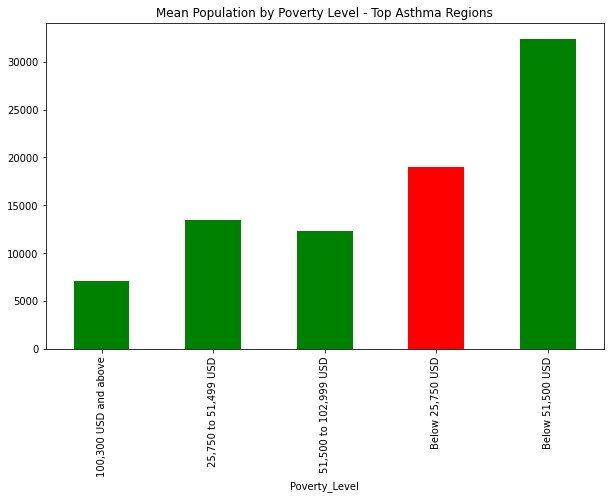

In [47]:
mean_race_asthma_graph = mean_race_asthma.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
mean_race_asthma_graph.set_title('Mean Population by Poverty Level - Top Asthma Regions')

In [53]:
top_asthma_df_grouped = top_asthma_df.groupby(['Fips','Poverty_Level'])['Data']
poverty_asthma_df = top_asthma_df_grouped.mean()
poverty_asthma_df.reset_index()
poverty_asthma_df

Fips  Poverty_Level        
110   100,300 USD and above    17336.397378
      25,750 to 51,499 USD     13555.336556
      51,500 to 102,999 USD    16599.792571
      Below 25,750 USD         18450.173496
      Below 51,500 USD         32005.510051
111   100,300 USD and above    12476.105969
      25,750 to 51,499 USD     15063.394087
      51,500 to 102,999 USD    13223.878754
      Below 25,750 USD         18282.554523
      Below 51,500 USD         33345.948610
201   100,300 USD and above     4060.608189
      25,750 to 51,499 USD     12714.819293
      51,500 to 102,999 USD     9983.856352
      Below 25,750 USD         19251.076150
      Below 51,500 USD         31965.895443
202   100,300 USD and above     2318.680031
      25,750 to 51,499 USD      7260.389455
      51,500 to 102,999 USD     5700.960943
      Below 25,750 USD         10992.709587
      Below 51,500 USD         18253.099041
203   100,300 USD and above     3504.963561
      25,750 to 51,499 USD     10543.121056
    

Text(0.5, 1.0, 'Mean Poverty Levels by Community - Top Asthma Regions')

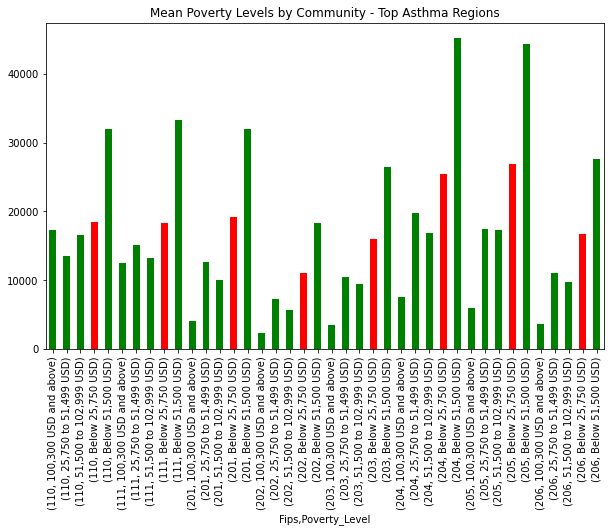

In [54]:
poverty_asthma_graph = poverty_asthma_df.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
poverty_asthma_graph.set_title('Mean Poverty Levels by Community - Top Asthma Regions')

In [16]:
mean_poverty5 = poverty5_df.groupby('Poverty Level').mean()
mean_poverty5

Poverty Level
100 to 199% FPL       14456.862670
200 to 399% FPL       21379.291921
400% FPL and above    73370.670381
Below 100% FPL        20161.756876
Below 200% FPL        34618.619547
Name: Data, dtype: float64

Text(0.5, 1.0, 'Mean Poverty Levels - Top 5 Asthma Community Districts')

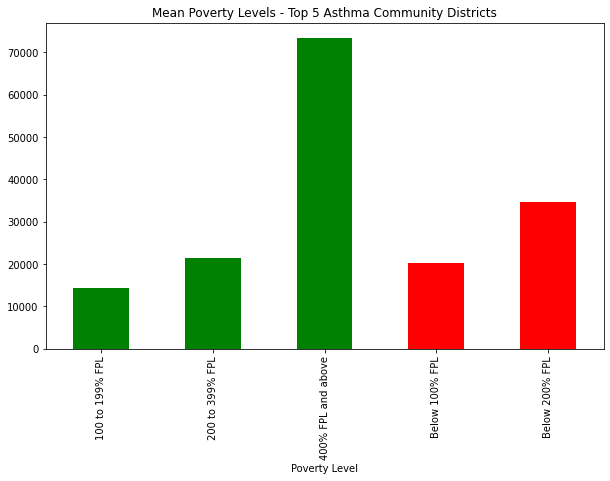

In [17]:
mean_poverty5_graph = mean_poverty5.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'red'])
mean_poverty5_graph.set_title('Mean Poverty Levels - Top 5 Asthma Community Districts')